In [1]:
import pandas as pd

In [11]:
df=pd.read_csv('diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
import seaborn as sns

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
import numpy as np
df['Outcome']=np.where(df['Outcome']==1,"Diabetic","Non Diabetic")
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age       Outcome  
0                     0.627   50      Diabetic  
1                     0.351   31  Non Diabetic  
2                     0.672   32      Diabetic  
3                     0.167   21  Non Diabetic  
4                     2.288   33      Diabetic

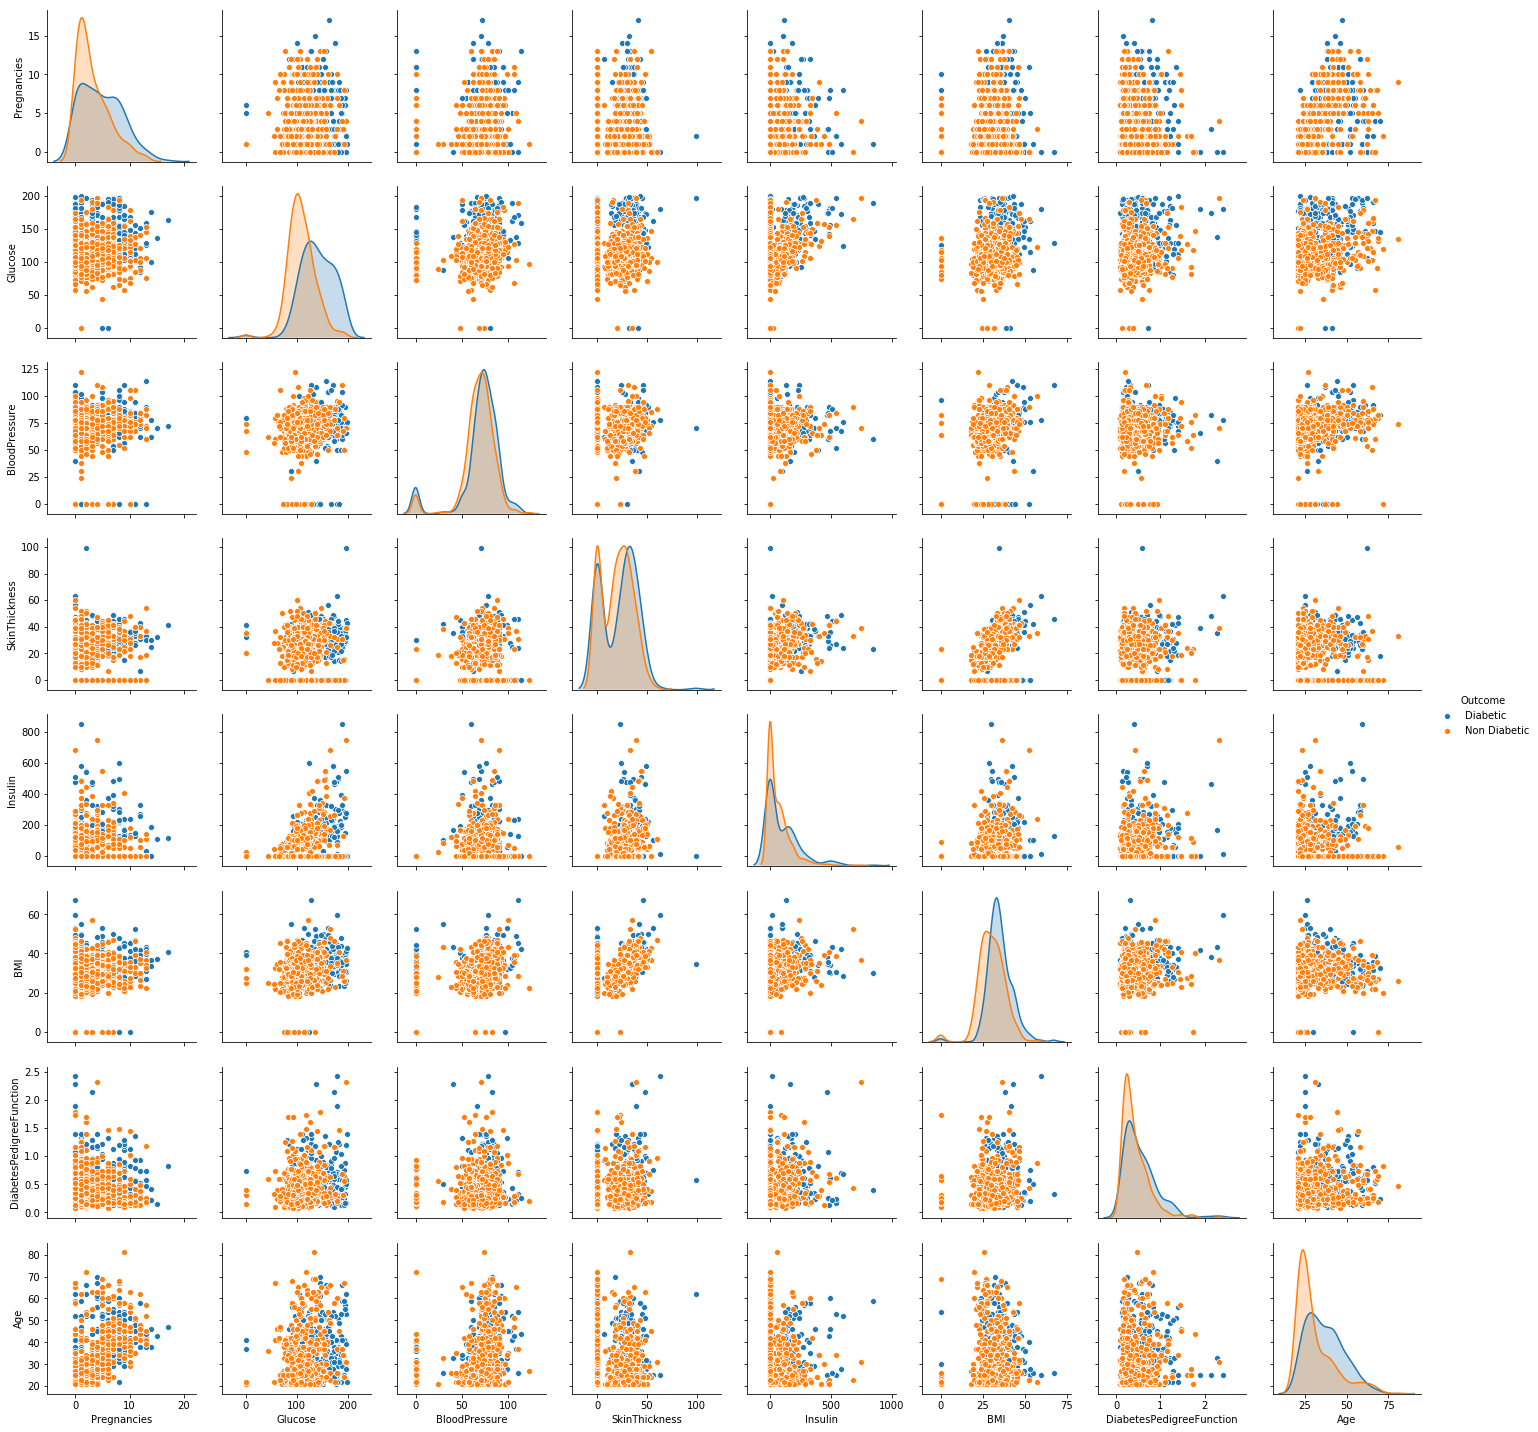

In [14]:
sns.pairplot(df,hue="Outcome")

In [2]:
df=pd.read_csv('diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
X=df.drop('Outcome',axis=1).values ## all independent value
y = df['Outcome'].values ## dependent values

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [5]:
### libraries from pytorch
import torch
import torch.nn as nn 
import torch.nn.functional as F

In [6]:
#### creating Tensors
#### We have to convert it to float tensor
X_train = torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [7]:
df.shape

(768, 9)

In [25]:
#### Creating Model with Pytorch
### Here we will be creating the Neural Network by initiating the class and inheriting from parent class nn.module
class ANN_Model(nn.Module):
    def __init__(self,input_features=8,hidden1=20,hidden2=20,out_features=2):
        super().__init__()
        self.f_connected1=nn.Linear(input_features,hidden1)##first fully connected network from input layer to hidden layer 1
        self.f_connected2=nn.Linear(hidden1,hidden2)## Second fully connected network from hidden layer 1 to hidden layer 2
        self.out=nn.Linear(hidden2,out_features) ## Output layer from 2nd hidden layer 2  to output layer
    ## Forward function for activation function into neural network
    def forward(self,x):
        x=F.relu(self.f_connected1(x))## first activation function for hidden layer 1
        x=F.relu(self.f_connected2(x))## 2nd activation function for hidden layer 2
        x=self.out(x)
        return x

In [26]:
#### instantiate my ANN model
torch.manual_seed(20) ## intial weights will be applied
model = ANN_Model()

In [27]:
#### its exactly same like model.summary()
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [28]:
## its basically a generator
model.parameters()

<generator object Module.parameters at 0x000000A067B41318>

In [29]:
### Backward propagation-- Define the loss function,define the optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)##passing all the parameters to the optimizer layer wise and learning rate

In [30]:
%%time
epochs = 500
final_losses = [] ## to store all loss value
for i in range(epochs):
    i=i+1
    y_pred= model.forward(X_train) ## prediction value
    loss=loss_function(y_pred,y_train) ## calculating loss between actual and predicted value
    final_losses.append(loss) ## appending all loss value to the list
    if i%10==1:
        print("Epoch Number: {} and loss: {}".format(i,loss.item())) ##every 10 epochs print the loss value
        
    optimizer.zero_grad()## this function will reduce the loss after every epoch
    loss.backward()## backpropagating the loss function by derivative
    optimizer.step()## for single optimization step

Epoch Number: 1 and loss: 3.457212209701538
Epoch Number: 11 and loss: 0.8019212484359741
Epoch Number: 21 and loss: 0.6090322732925415
Epoch Number: 31 and loss: 0.5917770266532898
Epoch Number: 41 and loss: 0.5679707527160645
Epoch Number: 51 and loss: 0.5529040098190308
Epoch Number: 61 and loss: 0.5410096645355225
Epoch Number: 71 and loss: 0.5310391783714294
Epoch Number: 81 and loss: 0.522036075592041
Epoch Number: 91 and loss: 0.5135970711708069
Epoch Number: 101 and loss: 0.5061254501342773
Epoch Number: 111 and loss: 0.49834126234054565
Epoch Number: 121 and loss: 0.49605482816696167
Epoch Number: 131 and loss: 0.4828636348247528
Epoch Number: 141 and loss: 0.4756038784980774
Epoch Number: 151 and loss: 0.4799228608608246
Epoch Number: 161 and loss: 0.479302316904068
Epoch Number: 171 and loss: 0.4650035500526428
Epoch Number: 181 and loss: 0.4582119882106781
Epoch Number: 191 and loss: 0.45270317792892456
Epoch Number: 201 and loss: 0.44579964876174927
Epoch Number: 211 and l

In [23]:
### plot the loss function
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'loss')

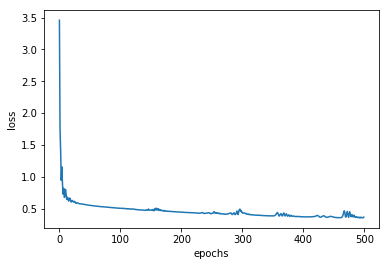

In [31]:
## loss plot
plt.plot(range(epochs),final_losses)
plt.xlabel('epochs')
plt.ylabel('loss')

In [36]:
### prediction on X_test data
predictions = []
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred=model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())


1
0
0
1
0
0
1
1
0
0
1
1
0
1
0
0
1
0
0
0
1
0
0
0
0
1
0
1
0
0
0
0
0
1
0
1
1
0
0
1
0
0
0
1
1
0
0
0
1
0
0
0
1
0
0
1
0
0
0
0
1
0
0
1
1
1
0
0
0
0
0
0
0
1
1
0
0
1
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
1
1
0
0
0
1
0
1
1
0
0
0
0
1
0
1
0
1
0
0
0
0
0
0
0
0
1
0
0
1
0
1
0
0
1
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0


In [37]:
predictions

[1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0]

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predictions)
cm

array([[92, 15],
       [17, 30]], dtype=int64)

Text(69.0, 0.5, 'Predicted values')

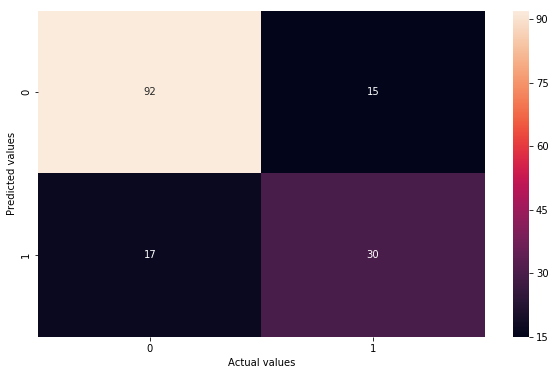

In [40]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

In [41]:
from sklearn.metrics import accuracy_score
score= accuracy_score(y_test,predictions)

In [42]:
score

0.7922077922077922

In [44]:
### save the model
## saving model in pytorch .here we are using .pt extension at last
torch.save(model,'diabetes.pt')

In [45]:
### save and loading model
model = torch.load('diabetes.pt')

In [46]:
## to get the summary of the model
model.eval()

ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [60]:
### prediction of new data point
## for that taking a record from existing dataframe
list(df.iloc[0,:-1])

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]

In [61]:
## New Data
lst1 = [6.0, 130.0, 72.0, 40.0, 0.0, 25.6, 0.627, 45.0]

In [62]:
new_data=torch.FloatTensor(lst1)

In [64]:
### prediction on new data
with torch.no_grad():
    print(model(new_data))
    print("Prediction = ",model(new_data).argmax().item())

tensor([1.5250, 1.1423])
Prediction =  0
